# Matrix matrix multiplication performance

In [2]:
import iarray as ia
import numpy as np
from itertools import zip_longest as izip
from time import time
import ctypes
import matplotlib.pyplot as plt
%matplotlib inline


mkl_rt = ctypes.CDLL('libmkl_rt.dylib')
mkl_set_num_threads = mkl_rt.MKL_Set_Num_Threads
nrep = 10

seq = []
mul = []

## Plainbuffer

In [3]:
shape = [2000, 2000]
pshape = None
bshape = [2000, 2000]
size = int(np.prod(shape))

### Sequential

In [5]:
mkl_set_num_threads(1)
cfg = ia.Config(max_num_threads=1)
ctx = ia.Context(cfg)

a = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
an = ia.iarray2numpy(ctx, a)

b = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
bn = ia.iarray2numpy(ctx, b)

t0 = time()
for _ in range(nrep):
    cn2 = np.matmul(an, bn)
t1 = time()
t_np = (t1 - t0) / nrep
seq.append(t_np)

print(f"Time to compute matmul with numpy: {round(t_np, 4)} s")

t0 = time()
for i in range(nrep):
    c = ia.matmul(ctx, a, b, bshape, bshape)
t1 = time()
t_ia = (t1 - t0) / nrep
seq.append(t_ia)

print(f"Time to compute matmul with iarray: {round(t_ia, 4)} s")

cn = ia.iarray2numpy(ctx, c)

np.testing.assert_almost_equal(cn, cn2)

print(f"Numpy is {round(t_ia/t_np, 4)}x more faster than iarray")

Time to compute matmul with numpy: 0.4346 s
Time to compute matmul with iarray: 0.498 s
Numpy is 1.1458x more faster than iarray


### Multithreading

In [4]:
mkl_set_num_threads(4)
cfg = ia.Config(max_num_threads=4)
ctx = ia.Context(cfg)

a = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
an = ia.iarray2numpy(ctx, a)

b = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
bn = ia.iarray2numpy(ctx, b)

t0 = time()
for _ in range(nrep):
    cn2 = np.matmul(an, bn)
t1 = time()
t_np = (t1 - t0) / nrep
mul.append(t_np)

print(f"Time to compute matmul with numpy: {round(t_np, 4)} s")

t0 = time()
for i in range(nrep):
    c = ia.matmul(ctx, a, b, bshape, bshape)
t1 = time()
t_ia = (t1 - t0) / nrep
mul.append(t_ia)

print(f"Time to compute matmul with iarray: {round(t_ia, 4)} s")

cn = ia.iarray2numpy(ctx, c)

np.testing.assert_almost_equal(cn, cn2)

print(f"Numpy is {round(t_ia/t_np, 4)}x more faster than iarray")

Time to compute matmul with numpy: 0.2187 s
Time to compute matmul with iarray: 0.2485 s
Numpy is 1.1363x more faster than iarray


## Superchunk (without compression)

In [5]:
shape = [2000, 2000]
pshape = [200, 200]
bshape = [200, 200]
size = int(np.prod(shape))

### Sequential

In [6]:
mkl_set_num_threads(1)
cfg = ia.Config(max_num_threads=1, compression_level=0)
ctx = ia.Context(cfg)

a = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
an = ia.iarray2numpy(ctx, a)

b = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
bn = ia.iarray2numpy(ctx, b)

t0 = time()
for _ in range(nrep):
    cn2 = np.matmul(an, bn)
t1 = time()
t_np = (t1 - t0) / nrep

print(f"Time to compute matmul with numpy: {round(t_np, 4)} s")

t0 = time()
for i in range(nrep):
    c = ia.matmul(ctx, a, b, bshape, bshape)
t1 = time()
t_ia = (t1 - t0) / nrep
seq.append(t_ia)

print(f"Time to compute matmul with iarray: {round(t_ia, 4)} s")

cn = ia.iarray2numpy(ctx, c)

np.testing.assert_almost_equal(cn, cn2)

print(f"Numpy is {round(t_ia/t_np, 4)}x more faster than iarray")

Time to compute matmul with numpy: 0.4054 s
Time to compute matmul with iarray: 0.7358 s
Numpy is 1.8151x more faster than iarray


### Multithreading

In [7]:
mkl_set_num_threads(4)
cfg = ia.Config(max_num_threads=4, compression_level=0)
ctx = ia.Context(cfg)

a = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
an = ia.iarray2numpy(ctx, a)

b = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
bn = ia.iarray2numpy(ctx, b)

t0 = time()
for _ in range(nrep):
    cn2 = np.matmul(an, bn)
t1 = time()
t_np = (t1 - t0) / nrep

print(f"Time to compute matmul with numpy: {round(t_np, 4)} s")

t0 = time()
for i in range(nrep):
    c = ia.matmul(ctx, a, b, bshape, bshape)
t1 = time()
t_ia = (t1 - t0) / nrep
mul.append(t_ia)

print(f"Time to compute matmul with iarray: {round(t_ia, 4)} s")

cn = ia.iarray2numpy(ctx, c)

np.testing.assert_almost_equal(cn, cn2)

print(f"Numpy is {round(t_ia/t_np, 4)}x more faster than iarray")

Time to compute matmul with numpy: 0.2363 s
Time to compute matmul with iarray: 0.5462 s
Numpy is 2.3117x more faster than iarray


## Superchunk (with compression)

In [8]:
shape = [2000, 2000]
pshape = [200, 200]
bshape = [200, 200]
size = int(np.prod(shape))

### Sequential

In [9]:
mkl_set_num_threads(1)
cfg = ia.Config(max_num_threads=1, compression_level=5)
ctx = ia.Context(cfg)

a = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
an = ia.iarray2numpy(ctx, a)

b = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
bn = ia.iarray2numpy(ctx, b)

t0 = time()
for _ in range(nrep):
    cn2 = np.matmul(an, bn)
t1 = time()
t_np = (t1 - t0) / nrep

print(f"Time to compute matmul with numpy: {round(t_np, 4)} s")

t0 = time()
for i in range(nrep):
    c = ia.matmul(ctx, a, b, bshape, bshape)
t1 = time()
t_ia = (t1 - t0) / nrep
seq.append(t_ia)

print(f"Time to compute matmul with iarray: {round(t_ia, 4)} s")

cn = ia.iarray2numpy(ctx, c)

np.testing.assert_almost_equal(cn, cn2)

print(f"Numpy is {round(t_ia/t_np, 4)}x more faster than iarray")

Time to compute matmul with numpy: 0.4606 s
Time to compute matmul with iarray: 0.9122 s
Numpy is 1.9806x more faster than iarray


### Multithreading

In [10]:
mkl_set_num_threads(4)
cfg = ia.Config(max_num_threads=4, compression_level=5)
ctx = ia.Context(cfg)

a = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
an = ia.iarray2numpy(ctx, a)

b = ia.linspace(ctx, size, -1, 1, shape=shape, pshape=pshape)
bn = ia.iarray2numpy(ctx, b)

t0 = time()
for _ in range(nrep):
    cn2 = np.matmul(an, bn)
t1 = time()
t_np = (t1 - t0) / nrep

print(f"Time to compute matmul with numpy: {round(t_np, 4)} s")

t0 = time()
for i in range(nrep):
    c = ia.matmul(ctx, a, b, bshape, bshape)
t1 = time()
t_ia = (t1 - t0) / nrep
mul.append(t_ia)

print(f"Time to compute matmul with iarray: {round(t_ia, 4)} s")

cn = ia.iarray2numpy(ctx, c)

np.testing.assert_almost_equal(cn, cn2)

print(f"Numpy is {round(t_ia/t_np, 4)}x more faster than iarray")

Time to compute matmul with numpy: 0.2543 s
Time to compute matmul with iarray: 0.7981 s
Numpy is 3.1382x more faster than iarray


## Results

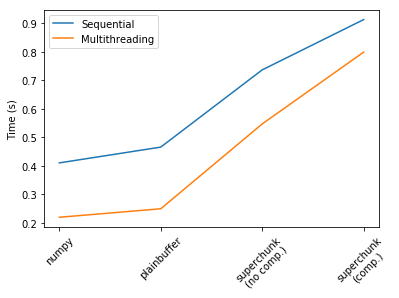

In [11]:
xticks = ("numpy", "plainbuffer", "superchunk\n(no comp.)", "superchunk\n(comp.)")
plt.plot(xticks, seq, label="Sequential")
plt.plot(xticks, mul, label="Multithreading")
plt.xticks(rotation=45)
plt.ylabel("Time (s)")
plt.legend()
plt.show()